# **EDA For Host Descriptions**

-----
### Imports

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandasql import sqldf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords

-------
## Reading in the Listings Dataset

In [4]:
listings = pd.read_csv('../data/listings_cleaned.csv')

In [5]:
listings.head(2)

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,reviews_per_month,city,state,zip_codes,bathrooms,bathrooms_shared,amenities_count,host_verifications_count,private_listing,rating_target
0,3781,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,3,100.0,0,...,0.29,Boston,Massachusetts,2128,1.0,0,31,3,1,3
1,5506,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,3,100.0,1,...,0.90,Boston,Massachusetts,2119,1.0,0,30,4,1,2


In [6]:
listings['description'].dtype

dtype('O')

In [7]:
def lowercase(description):
    '''function to lowercase all text'''
    
    #lowercase
    description = description.lower()
    return description

# Apply fuction to data
listings['clean_description'] = listings['description'].apply(lowercase)

In [8]:
listings['clean_description'].head(3)

0    fully separate apartment in a two apartment bu...
1    private guest room with private bath, you do n...
2    comfortable,  fully equipped private apartment...
Name: clean_description, dtype: object

-------
### **Exploring Descriptions Data**

In [9]:
df = listings.copy()

In [10]:
sql = """
SELECT *
FROM listings
LIMIT 5;
"""

df = sqldf(sql)
df.head()

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,city,state,zip_codes,bathrooms,bathrooms_shared,amenities_count,host_verifications_count,private_listing,rating_target,clean_description
0,3781,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,3,100.0,0,...,Boston,Massachusetts,2128,1.0,0,31,3,1,3,fully separate apartment in a two apartment bu...
1,5506,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,3,100.0,1,...,Boston,Massachusetts,2119,1.0,0,30,4,1,2,"private guest room with private bath, you do n..."
2,6695,2021-09-19,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19,3,100.0,1,...,Boston,Massachusetts,2119,1.0,0,30,4,1,2,"comfortable, fully equipped private apartment..."
3,8789,2021-09-19,Curved Glass Studio/1bd facing Park,This unit is for sale. There will need to be o...,26988,Anne,2009-07-22,3,100.0,1,...,Boston,Massachusetts,2117,1.0,0,27,8,1,2,this unit is for sale. there will need to be o...
4,10730,2021-09-19,Bright 1bed facing Golden Dome,"Bright, spacious unit, new galley kitchen, new...",26988,Anne,2009-07-22,3,100.0,1,...,Boston,Massachusetts,2117,1.0,0,30,8,1,2,"bright, spacious unit, new galley kitchen, new..."


----
### Lengths of Descriptions and Common Words

In [12]:
# create new columns for comment character length and word count
listings['comment_char_length'] = [len(str(i)) for i in listings['clean_description']]
listings['comment_word_count'] = [len(str(i).split(" ")) for i in listings['clean_description']]
listings.head(3)

,id,last_scraped,name,description,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,zip_codes,bathrooms,bathrooms_shared,amenities_count,host_verifications_count,private_listing,rating_target,clean_description,comment_char_length,comment_word_count
0,3781,2021-09-19,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,4804,Frank,2008-12-03,3,100.0,0,...,2128,1.0,0,31,3,1,3,fully separate apartment in a two apartment bu...,1000,168
1,5506,2021-09-19,** Private! Minutes to center!**,"Private guest room with private bath, You do n...",8229,Terry,2009-02-19,3,100.0,1,...,2119,1.0,0,30,4,1,2,"private guest room with private bath, you do n...",1000,166
2,6695,2021-09-19,Home Away from Home! Condo,"Comfortable, Fully Equipped private apartment...",8229,Terry,2009-02-19,3,100.0,1,...,2119,1.0,0,30,4,1,2,"comfortable, fully equipped private apartment...",1000,157


In [14]:
listings[['comment_word_count', 'comment_char_length']].describe()

,comment_word_count,comment_char_length
count,10664.000000,10664.000000
mean,137.016317,843.548387
std,43.865948,259.906852
min,3.000000,15.000000
25%,117.000000,733.750000
50%,156.000000,1000.000000
75%,167.000000,1000.000000
max,282.000000,1001.000000


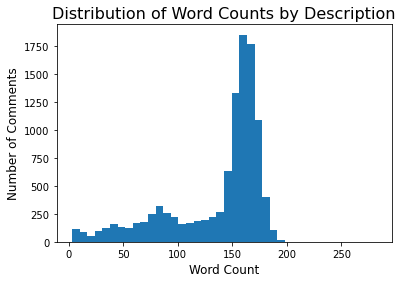

In [38]:
# Distribution of Word Counts
plt.hist(listings['comment_word_count'], bins = 40)
plt.title('Distribution of Word Counts by Description', fontsize =16)
plt.xlabel('Word Count', fontsize =12)
plt.ylabel('Number of Comments', fontsize =12);

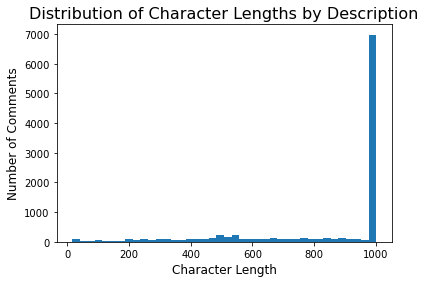

In [39]:
# Distribution of Character Lengths
plt.hist(listings['comment_char_length'], bins = 40)

plt.title('Distribution of Character Lengths by Description', fontsize =16)
plt.xlabel('Character Length', fontsize =12)
plt.ylabel('Number of Descriptions', fontsize =12);

In [51]:
# looking at longest and shortest posts by character length
print(listings[['id', 'host_name','comment_char_length']].sort_values('comment_char_length', ascending=False).head(5))
print(" ")
print("*"*60)
print(" ")
print(listings[['id','host_name','comment_char_length']].sort_values('comment_char_length').head(5))

            id             host_name  comment_char_length
5434  21735562                Kursad                 1001
3135  21735562                Kursad                 1001
893   21735562                Kursad                 1001
6304  45699883  Global Luxury Suites                 1000
6298  45652898                 Cindy                 1000
 
************************************************************
 
            id host_name  comment_char_length
1498  37583345    Robert                   15
8262  37583345    Robert                   15
3692  37583345    Robert                   15
6015  37583345    Robert                   15
8188  35407404      Mark                   23


In [22]:
# looking at longest and shortest posts by word count
print(listings[['id','host_name','comment_word_count']].sort_values('comment_word_count', ascending=False).head(5))
print(" ")
print("*"*60)
print(" ")
print(listings[['id','host_name','comment_word_count']].sort_values('comment_word_count').head(5))

            id host_name  comment_word_count
3474  30858812     Cathy                 282
8050  30858812     Cathy                 282
9883  21229815     Jenny                 199
2961  18194673     Katie                 198
723   18194673     Katie                 198
 
************************************************************
 
            id host_name  comment_word_count
4193  48960486     Maria                   3
8971  52380004  Hashouki                   3
3948  45515569     Aftab                   3
6908  53513507    Hesham                   3
2190  51229537     Katia                   3


---

## **EDA Specifically on Comments Column**

#### Vectorize the text to look at Common Word Appearances

-----
### *CountVectorize*

In [23]:
listings.shape

(10664, 58)

In [24]:
# Instantiate the CountVectorizer and transform 
cvec = CountVectorizer(max_features=50)
post_matrix = cvec.fit_transform(listings['clean_description'].astype('U').values)

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = cvec.get_feature_names_out())
post_df.shape

(10664, 50)

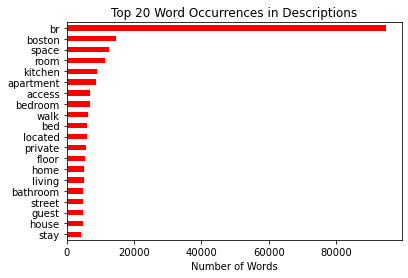

In [40]:
# check to see the top words - if mostly stopwords, get rid of stopwords
# code taken from lesson 5.05 on Natural Language Processing

post_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'r')
plt.gca().invert_yaxis() # this code was taken from Andras Deak's response on stack overflow
# https://stackoverflow.com/questions/34076177/matplotlib-horizontal-bar-chart-barh-is-upside-down
plt.title('Top 20 Word Occurrences in Descriptions')
plt.xlabel('Number of Words');

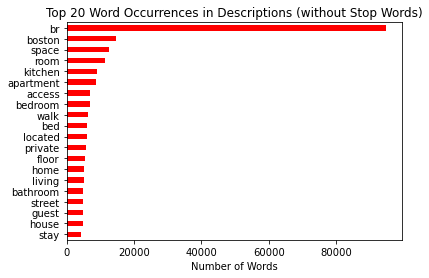

In [41]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(max_features=50, stop_words='english')
post_matrix = cvec.fit_transform(listings['clean_description'].astype('U').values)

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
post_df.sum().sort_values(ascending=False).head(20).plot(kind = 'barh', color='r')
plt.gca().invert_yaxis()

plt.title('Top 20 Word Occurrences in Descriptions (without Stop Words)')
plt.xlabel('Number of Words');

In [33]:
# Instantiate the CountVectorizer and transform 
# changed the number of max features
cvec = CountVectorizer(max_features=100)
post_matrix = cvec.fit_transform(listings['clean_description'].astype('U').values)

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = cvec.get_feature_names_out())
post_df.shape

(10664, 100)

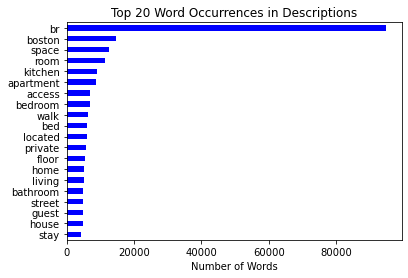

In [42]:
# check to see the top words - if mostly stopwords, get rid of stopwords
# code taken from lesson 5.05 on Natural Language Processing

post_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'b')
plt.gca().invert_yaxis()
plt.title('Top 20 Word Occurrences in Descriptions')
plt.xlabel('Number of Words');

(10664, 100)


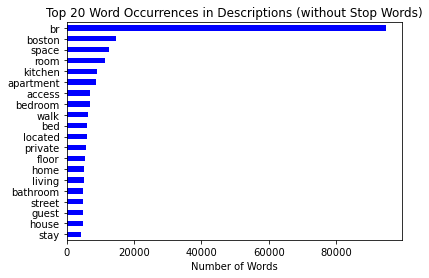

In [52]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(max_features=100, stop_words='english')
post_matrix = cvec.fit_transform(listings['clean_description'].astype('U').values)

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
print(post_df.shape)
post_df.sum().sort_values(ascending=False).head(20).plot(kind = 'barh', color='b')
plt.gca().invert_yaxis()

plt.title('Top 20 Word Occurrences in Descriptions (without Stop Words)')
plt.xlabel('Number of Words');

(10664, 100)


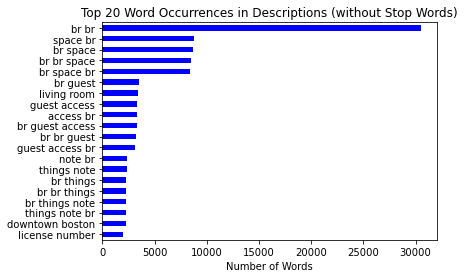

In [56]:
# most are stop words - recreate dataframe without stopwords
cvec = CountVectorizer(max_features=100, stop_words='english', ngram_range=(2,3))
post_matrix = cvec.fit_transform(listings['clean_description'].astype('U').values)

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
print(post_df.shape)
post_df.sum().sort_values(ascending=False).head(20).plot(kind = 'barh', color='b')
plt.gca().invert_yaxis()

plt.title('Top 20 Word Occurrences in Descriptions (without Stop Words)')
plt.xlabel('Number of Words');

-----
### *(TF-IDF) Vectorizer*

In [47]:
# Instantiate the Tfidf Vectorizer and transform 
tvec = TfidfVectorizer(max_features = 50)
post_matrix = tvec.fit_transform(listings['clean_description'].astype('U').values)

# Creating dataframe of text data
post_df = pd.DataFrame(post_matrix.todense(),
                      columns = tvec.get_feature_names_out())
post_df.shape

(10664, 50)

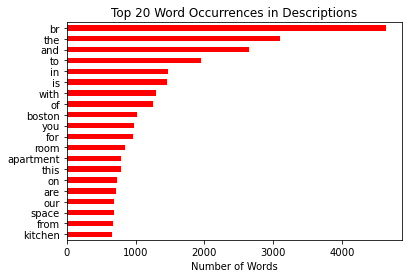

In [48]:
# check to see the top words - if mostly stopwords, get rid of stopwords

post_df.sum().sort_values(ascending = False).head(20).plot(kind = 'barh', color = 'r')
plt.gca().invert_yaxis()
plt.title('Top 20 Word Occurrences in Descriptions')
plt.xlabel('Number of Words');

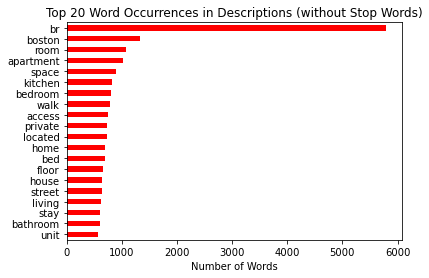

In [50]:
# most are stop words - recreate dataframe without stopwords
tvec = TfidfVectorizer(max_features = 50, stop_words='english')
post_matrix = tvec.fit_transform(listings['clean_description'].astype('U').values)

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = tvec.get_feature_names_out())
post_df.shape

post_df.sum().sort_values(ascending=False).head(20).plot(kind = 'barh', color='r')
plt.gca().invert_yaxis()
plt.title('Top 20 Word Occurrences in Descriptions (without Stop Words)')
plt.xlabel('Number of Words');

(10664, 100)


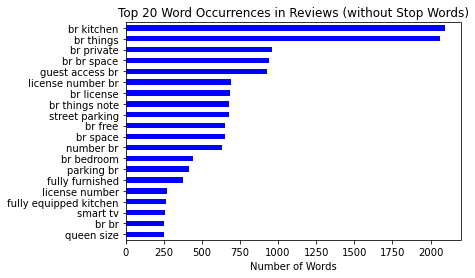

In [59]:
# most are stop words - recreate dataframe without stopwords
tvec = TfidfVectorizer(max_features=100, stop_words='english', ngram_range=(3,3))
post_matrix = tvec.fit_transform(listings['clean_description'].astype('U').values)

# new dataframe
post_df = pd.DataFrame(post_matrix.todense(), columns = cvec.get_feature_names_out())
print(post_df.shape)
post_df.sum().sort_values(ascending=False).head(20).plot(kind = 'barh', color='b')
plt.gca().invert_yaxis()

plt.title('Top 20 Word Occurrences in Reviews (without Stop Words)')
plt.xlabel('Number of Words');

In [33]:
# may be important to adjust stop words parameter when modeling